In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

activity                  2    3         100       200  300       400  \
starttime_formatted                                                     
00:00:00             0.000000  0.0  0.000000  0.000000  0.0  0.000000   
03:00:00             0.000196  0.0  0.000000  0.000000  0.0  0.000000   
03:15:00             0.000523  0.0  0.000000  0.000000  0.0  0.000000   
03:30:00             0.000229  0.0  0.000000  0.000000  0.0  0.000033   
03:45:00             0.000947  0.0  0.000000  0.000000  0.0  0.000065   
...                       ...  ...       ...       ...  ...       ...   
22:30:00             0.000131  0.0  0.000131  0.000196  0.0  0.000098   
22:45:00             0.000229  0.0  0.000392  0.000392  0.0  0.000327   
23:00:00             0.000098  0.0  0.000163  0.000131  0.0  0.000000   
23:15:00             0.000229  0.0  0.000131  0.000196  0.0  0.000261   
23:30:00             0.000294  0.0  0.000000  0.000098  0.0  0.000000   

activity                  500  
starttime_formatte

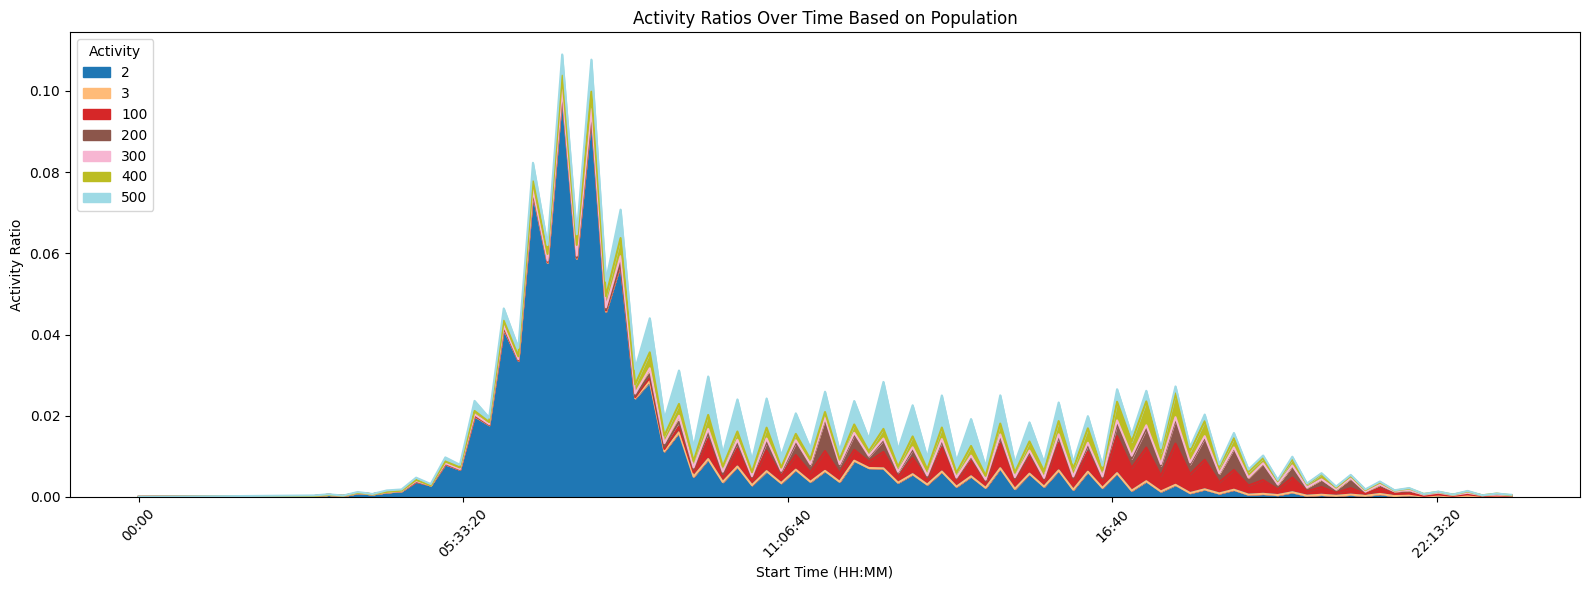

In [56]:
def visualize_activity_ratios(file_path):
    # Load the data
    data = pd.read_csv(file_path, names=['id', 'age', 'gender', 'occupation', 'starttime', 'duration', 'activity', 'lon', 'lat', 'citycode'], header=None, skiprows=1)
    
    # Convert 'starttime' from seconds to a readable time format (HH:MM)
    data['starttime_formatted'] = data['starttime'].apply(lambda x: (datetime.min + timedelta(seconds=x)).time())
    
    # Group the data by 'starttime_formatted' and 'activity' and count unique 'id's to consider population
    grouped_data = data.groupby(['starttime_formatted', 'activity'])['id'].nunique().unstack(fill_value=0)
    
    # Calculate the ratio of activities based on the unique 'id' counts (population)
    population_per_time = len(data['id'].unique())  # Total unique individuals per starttime
    activity_ratios = grouped_data.div(population_per_time, axis=0)[[2,3,100,200,300,400,500]]
    print(activity_ratios[[2,3,100,200,300,400,500]])
    
    # Plotting with ordered activities and a diverse color palette
    plt.figure(figsize=(16, 6))
    activity_ratios.plot(kind='area', stacked=True, ax=plt.gca(), colormap='tab20')
    plt.title('Activity Ratios Over Time Based on Population')
    plt.xlabel('Start Time (HH:MM)')
    plt.ylabel('Activity Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Activity', loc='upper left')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
file_path = '/mnt/large/data/PseudoPFLOW/activity/13/person_13101_labor.csv'  # Replace with your actual file path
visualize_activity_ratios(file_path)

In [53]:
def visualize_activity_ratios(file_path):
    # Load the data
    data = pd.read_csv(file_path, names=['id', 'age', 'gender', 'occupation', 'starttime', 'duration', 'activity', 'lon', 'lat', 'citycode'], header=None, skiprows=1)
    
    # Convert 'starttime' from seconds to a readable time format (HH:MM)
    data['starttime_formatted'] = data['starttime'].apply(lambda x: (datetime.min + timedelta(seconds=x)).time())
    
    # Duplicate 00:00 data for missing time slots between 00:15 and 02:45
    midnight_data = data[data['starttime_formatted'] == datetime.strptime("00:00", "%H:%M").time()]
    for minutes in range(15, 166, 15):  # Loop from 00:15 to 02:45 in 15-minute intervals
        fill_time = (datetime.min + timedelta(minutes=minutes)).time()
        fill_data = midnight_data.copy()
        fill_data['starttime_formatted'] = fill_time
        data = pd.concat([data, fill_data])
    
    # Group the data by 'starttime_formatted' and 'activity' and count unique 'id's
    grouped_data = data.groupby(['starttime_formatted', 'activity'])['id'].nunique().unstack(fill_value=0)
    
    # Calculate the ratio of activities based on the unique 'id' counts (population)
    population_per_time = len(data['id'].unique())  # Total unique individuals per starttime
    activity_ratios = grouped_data.div(population_per_time, axis=0)[[2,3, 100,200,300,400, 500]]
    
    # Plotting with ordered activities and a diverse color palette
    plt.figure(figsize=(16, 6))
    activity_ratios.plot(kind='area', stacked=True, ax=plt.gca(), colormap='tab20')
    plt.title('Activity Ratios Over Time Based on Population')
    plt.xlabel('Start Time (HH:MM)')
    plt.ylabel('Activity Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Activity', loc='upper left')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# You can use this improved function by passing the file path as an argument.


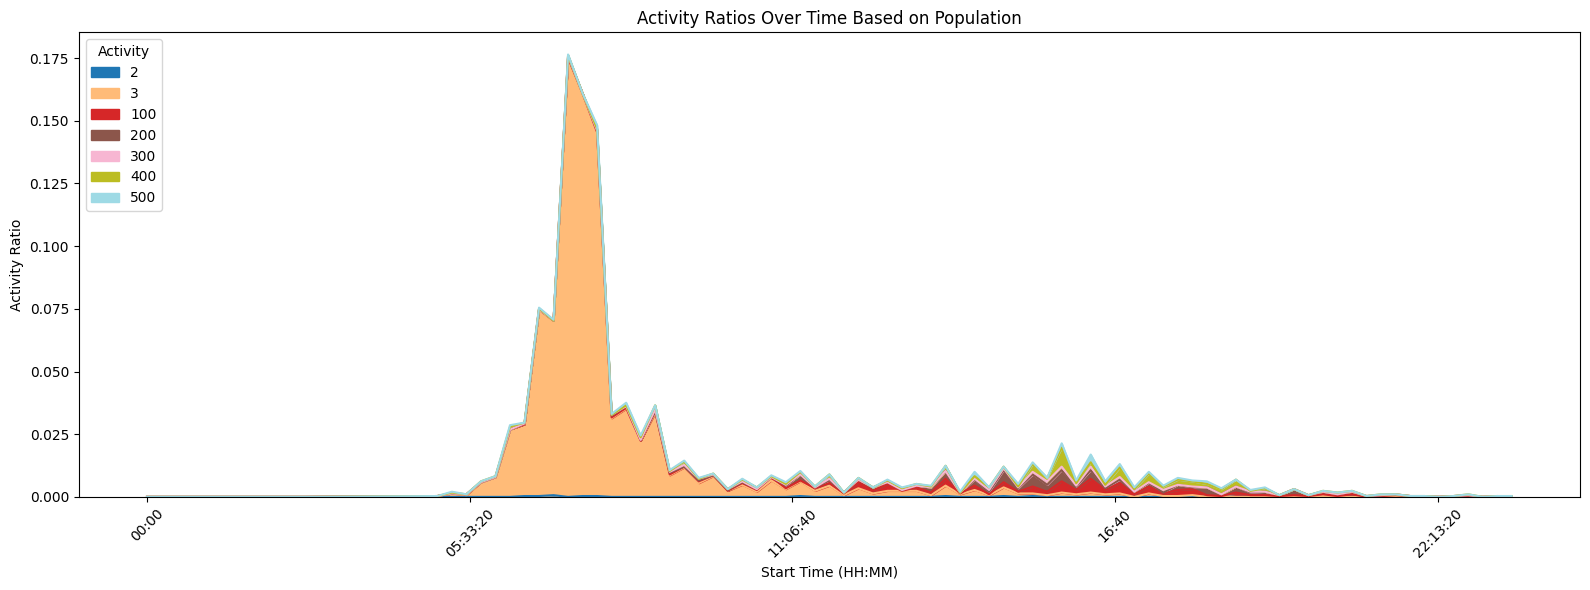

In [54]:
file_path = '/mnt/large/data/PseudoPFLOW/activity/1/person_01101_student.csv'
visualize_activity_ratios(file_path)

In [43]:
def calculate_activity_ratios(file_path):
    data = pd.read_csv(file_path, names=['id', 'age', 'gender', 'occupation', 'starttime', 'duration', 'activity', 'lon', 'lat', 'citycode'], header=None, skiprows=1)
    data['starttime_formatted'] = data['starttime'].apply(lambda x: (datetime.min + timedelta(seconds=x)).time())
    
    midnight_data = data[data['starttime_formatted'] == datetime.strptime("00:00", "%H:%M").time()]
    for minutes in range(15, 166, 15):
        fill_time = (datetime.min + timedelta(minutes=minutes)).time()
        fill_data = midnight_data.copy()
        fill_data['starttime_formatted'] = fill_time
        data = pd.concat([data, fill_data])
        
    grouped_data = data.groupby(['starttime_formatted', 'activity'])['id'].nunique().unstack(fill_value=0)
    population_per_time = len(data['id'].unique())
    activity_ratios = grouped_data.div(population_per_time, axis=0)[[2,3,100,200,300,400,500]]
    
    return activity_ratios


In [44]:
file_path1 = '/mnt/large/data/PseudoPFLOW/activity/13/person_13101_labor.csv'  # Replace with the actual path of the first file
file_path2 = '/mnt/large/data/PseudoPFLOW/activity/13_2018/person_13101_labor.csv'  # Replace with the actual path of the second file

activity_ratios_1 = calculate_activity_ratios(file_path1)
activity_ratios_2 = calculate_activity_ratios(file_path2)

# Calculate the differences
differences = activity_ratios_1 - activity_ratios_2


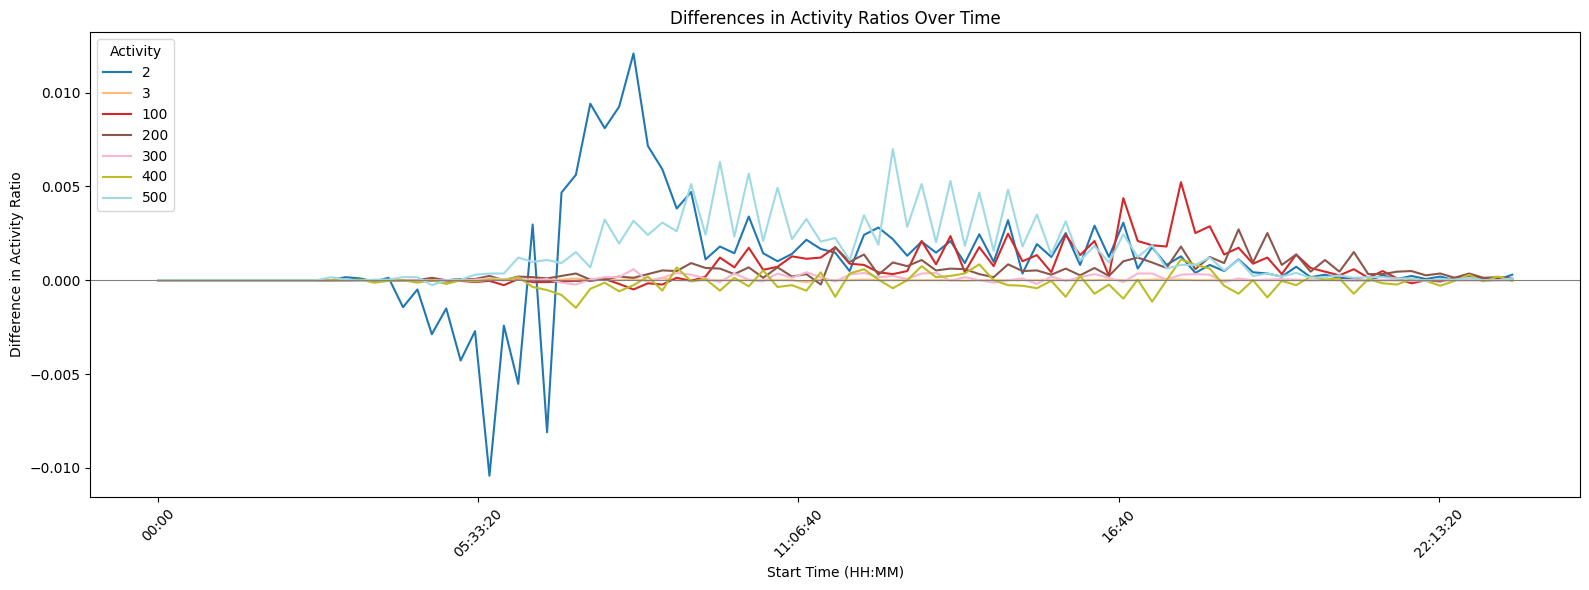

In [46]:
plt.figure(figsize=(16, 6))
differences.plot(kind='line', ax=plt.gca(), colormap='tab20')  # Changed from 'area' to 'line'
plt.title('Differences in Activity Ratios Over Time')
plt.xlabel('Start Time (HH:MM)')
plt.ylabel('Difference in Activity Ratio')
plt.axhline(0, color='gray', lw=0.8)  # Adds a horizontal line at y=0 for reference
plt.xticks(rotation=45)
plt.legend(title='Activity', loc='upper left')
plt.tight_layout()
plt.show()

